# Data Preparation

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
pd.set_option('display.max_rows',200)

In [4]:
videos_stats = pd.read_csv('videos_stats.csv')
videos_stats

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,23/08/2022,tech,3407.00,672.00,135612.00
1,The most EXPENSIVE thing I own.,b3x28s61q3c,24/08/2022,tech,76779.00,4306.00,1758063.00
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,23/08/2022,tech,63825.00,3338.00,1564007.00
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,23/08/2022,tech,71566.00,1426.00,922918.00
4,Best Back to School Tech 2022!,ErMwWXQxHp0,08/08/2022,tech,96513.00,5155.00,1855644.00


In [5]:
comments = pd.read_csv('comments.csv')
comments

,Video ID,Comment,Likes,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2
...,...,...,...,...
18404,cyLWtMSry58,I really like the point about engineering tool...,0,2
18405,cyLWtMSry58,I’ve just started exploring this field. And th...,20,2
18406,cyLWtMSry58,Excelente video con una pregunta filosófica pr...,1,1
18407,cyLWtMSry58,"Hey Daniel, just discovered your channel a cou...",35,2


## Data cleaning

Droping i

In [5]:
videos_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1881 non-null   object 
 1   Video ID      1881 non-null   object 
 2   Published At  1881 non-null   object 
 3   Keyword       1881 non-null   object 
 4   Likes         1879 non-null   float64
 5   Comments      1879 non-null   float64
 6   Views         1879 non-null   float64
dtypes: float64(3), object(4)
memory usage: 103.0+ KB


In [6]:
videos_stats.isna().sum()

Title           0
Video ID        0
Published At    0
Keyword         0
Likes           2
Comments        2
Views           2
dtype: int64

In [7]:
videos_stats = videos_stats.dropna()

Checking if there is invalid values for the likes and the comments

In [8]:
videos_stats[(videos_stats['Likes']<=0) | ( videos_stats['Comments']<=0) ] 

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
243,How To Build A Business That Works | Brian Tra...,MN7yfV4UuCI,09/02/2021,business,-1.00,1144.00,676300.00
266,ตลาดถุงมือยางทรุด! ฉุดราคาร่วงลงทุนหด | BUSINE...,cG37cEi1nPc,23/08/2022,business,-1.00,13.00,12332.00
583,DON&#39;T GOOGLE THIS STUFF,NAV2laKrDv4,28/08/2017,google,-1.00,18676.00,6515548.00
1016,15 Kilo Zayıf Gösteren Kız Makyajı |Arkadaşlar...,#NAME?,23/08/2022,mukbang,-1.00,335.00,27451.00
1393,Mathematics and Chemistry : MathChemistry.com ...,V_vguZj_7FE,15/04/2013,mathchemistry,0.00,1.00,25.00
1677,FULL Marvel Studios Panel from Hall H | San Di...,rf-NqJQJHBU,24/07/2022,marvel,-1.00,821.00,553892.00
1701,SURVIVOR 🦀🦂 Best Action Movies 2022 🦀🦂 Latest ...,__7MkaWFObQ,20/08/2022,movies,105.00,-1.00,28219.00
1709,BEST Auditions Of Songs From Movies | Amazing ...,ZcBBGC8_mfU,25/07/2022,movies,20138.00,-1.00,5351960.00
1710,The Magnificent Seven - Full Movie In English ...,1MZY_0tYmrs,29/12/2021,movies,-1.00,180.00,2389222.00
1711,TOP SECRET MISSION ⭐🌟 Best Action Movies 2022 ...,PIFa7wJ9c0c,18/07/2022,movies,643.00,0.00,24012.00


There is 11 entries with wrong values in either likes and comments 
we can fix it by first checking if those videos are actuall existing videos by searching or validating using the video Id which is the link of the video but, they are few so it's unecceary, we will drop them

In [9]:
videos_stats = videos_stats[(videos_stats['Likes']>0) & ( videos_stats['Comments']>0) ]

Checking the datatypes

In [10]:
videos_stats.dtypes

Title            object
Video ID         object
Published At     object
Keyword          object
Likes           float64
Comments        float64
Views           float64
dtype: object

In [11]:
videos_stats['Published At'] = pd.to_datetime(videos_stats ['Published At'], format='%d/%m/%Y', errors='coerce')

changing the data type of  views, likes and comments to int

In [12]:
# transforming columns from float to int64
videos_stats['Views'] = videos_stats['Views'].astype('int64')
videos_stats['Likes'] = videos_stats['Likes'].astype('int64')
videos_stats['Comments'] = videos_stats['Comments'].astype('int64')
videos_stats['Keyword'] = videos_stats['Keyword'].astype(str)

In [13]:
videos_stats.describe()

,Published At,Likes,Comments,Views
count,1868,1868.00,1868.00,1868.00
mean,2021-06-04 20:23:22.997858560,171051.27,7898.25,11672135.57
min,2007-07-16 00:00:00,1.00,1.00,63.00
25%,2021-02-20 06:00:00,2705.25,201.00,85156.25
50%,2022-06-13 12:00:00,15011.00,820.00,591947.00
75%,2022-08-23 00:00:00,61091.75,3411.50,2814055.25
max,2022-08-24 00:00:00,16445558.00,732818.00,4034122271.00
std,NaN,798466.37,37986.47,108761106.89


In [14]:
# Check for empty or whitespace-only titles
empty_titles = videos_stats['Title'].str.strip() == ''

# Check for non-string titles
non_string_titles = videos_stats['Title'].apply(lambda x: not isinstance(x, str))


In [15]:
videos_stats[empty_titles ]

,Title,Video ID,Published At,Keyword,Likes,Comments,Views


In [16]:
videos_stats[non_string_titles]

,Title,Video ID,Published At,Keyword,Likes,Comments,Views


Also we will find in some titles text like "& #39;" which  HTML entity representing the apostrophe character

The ID length should be 11 characters,so if we checked for enteries that doesn't met this critaria, we will find some with missing video Id, but they might be valid videos but they are little so removing them will make the dataset cleaner

In [17]:
invalid_length_video_ids = videos_stats['Video ID'].apply(lambda x: len(x) != 11)
videos_stats[invalid_length_video_ids]
# Drop rows with invalid video IDs
videos_stats = videos_stats[~invalid_length_video_ids]

In [18]:
# showing duplicates before droping them
videos_stats[videos_stats.duplicated(subset='Video ID', keep=False)]

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825,3338,1564007
88,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,gaming,63825,3338,1564007
91,I OPENED MY OWN ARCADE SHOP,WBK2_lD7KGA,2022-08-24,gaming,298406,15609,3773387
129,ASMR Gaming 😴 Fortnite 1 Kill = 1 Trigger Rela...,mqc6QqoGNWI,2022-08-24,gaming,563,85,14537
225,How to Solve a Rubik&#39;s Cube | WIRED,R-R0KrXvWbc,2019-09-05,how-to,339758,32718,29905105
319,20 Minecraft Block Facts You Maybe Didn&#39;t ...,LeC5yJq4tsI,2022-08-21,tutorial,57526,1115,1204024
423,How to Solve a Rubik&#39;s Cube | WIRED,R-R0KrXvWbc,2019-09-05,cubes,339759,32717,29905105
472,The History Of Chess: A Reflection Of Us,kkOweffr3II,2022-08-21,chess,2546,173,51885
682,The History Of Chess: A Reflection Of Us,kkOweffr3II,2022-08-21,history,2546,173,51885
848,ASMR Gaming 😴 Fortnite 1 Kill = 1 Trigger Rela...,mqc6QqoGNWI,2022-08-24,asmr,563,86,14537


In [19]:
# removing duplicates with the same video id and keeping the first one from videos_stats
videos_stats = videos_stats.drop_duplicates(subset='Video ID', keep='first')
# show if there are any duplicates
videos_stats[videos_stats.duplicated(subset='Video ID', keep=False)]


,Title,Video ID,Published At,Keyword,Likes,Comments,Views


In [20]:
# data cleaning for the comments dataset
comments.info()
comments.isna().sum()
# drop rows with missing values
comments = comments.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Video ID   18409 non-null  object
 1   Comment    18408 non-null  object
 2   Likes      18409 non-null  int64 
 3   Sentiment  18409 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 575.4+ KB


In [21]:
# Check for empty or whitespace-only comments
empty_comments = comments['Comment'].str.strip() == ''
print(comments[empty_comments])

Empty DataFrame
Columns: [Video ID, Comment, Likes, Sentiment]
Index: []


## Feature engineering

In [22]:
videos_to_change_indexs = [557,652,227,1129,653]
videos_stats.loc[videos_to_change_indexs, 'Keyword'] = 'music'
# print a list of all keywords
videos_stats['Keyword'].unique()
#creating categories for the keywords
categories = {
    "Technology": ['tech', 'apple', 'google'],
    "News": ['news', 'cnn'],
    "Gaming": ['gaming', 'minecraft', 'nintendo', 'xbox'],
    "Sports": ['sports', 'chess'],
    "How-To/Tutorials": ['how-to', 'tutorial'],
    "Business/Finance": ['business', 'finance', 'crypto','interview'],
    "History/Literature": ['history', 'literature'],
    "Entertainment": ['bed', 'trolling', 'asmr', 'music', 'food', 'mukbang', 'reaction', 'lofi', 'animals', 'mrbeast','marvel' ,'movies','cubes'],
    "Education": ['education', 'sat', 'mathchemistry', 'biology', 'physics'],
    "Computer Science": ['computer science','game development','data science','machine learning']
}

# Function to map keywords to categories
def map_keyword_to_category(keyword):
    for category, keywords in categories.items():
        if keyword in keywords:
            return category
    return 'Uncategorized'

# Create the new 'category' column
videos_stats['Category'] = videos_stats['Keyword'].apply(map_keyword_to_category)


In [23]:
# saving the video stats to  a new csv file called cleaned_video_stats.csv
videos_stats.to_csv('cleaned_video_stats.csv', index=False)

# Exploratory Data Analysis (EDA)

## Summary statistics

In [24]:
videos_stats.describe()

,Published At,Likes,Comments,Views
count,1828,1828.00,1828.00,1828.00
mean,2021-05-30 18:46:28.621444096,171151.87,7918.01,11734196.38
min,2007-07-16 00:00:00,1.00,1.00,63.00
25%,2021-02-05 18:00:00,2718.25,207.00,85271.25
50%,2022-06-12 12:00:00,15011.00,821.00,591947.00
75%,2022-08-22 00:00:00,60863.50,3387.50,2814055.25
max,2022-08-24 00:00:00,16445558.00,732818.00,4034122271.00
std,NaN,803956.78,38299.12,109880552.59


It looks like there is high difference between the median and the mean, and very high variation indicating that they are 
outliers, so before we take insgihgts right away let's look at those trendy videos are they actual videos? and how can we understand the centeral tendcy of likes, comments and views if those videos skew the data

In [25]:
# Here we are going to use the standard values of the interquartile range to detect outliers
# and we are going to look at it to see if they are actuall values
q1 = videos_stats['Views'].quantile(0.25)
q3 = videos_stats['Views'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers =(videos_stats['Views'] < lower_bound) | (videos_stats['Views'] > upper_bound)
trendy = videos_stats[outliers]
trendy.sort_values('Views', ascending=False)

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,Category
557,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,FzG4uDgje3M,2018-04-05,music,16445558,732818,4034122271,Entertainment
1121,Martin Garrix - Animals (Official Video),gCYcHz2k5x0,2013-06-17,animals,11025176,335455,1582262997,Entertainment
922,The Weeknd - Save Your Tears (Official Music V...,XXYlFuWEuKI,2021-01-05,music,6823113,270948,915457091,Entertainment
1118,Maroon 5 - Animals (Official Music Video),qpgTC9MDx1o,2014-09-29,animals,5743875,178361,826423766,Entertainment
752,Powfu - death bed (coffee for your head) (Offi...,jJPMnTXl63E,2020-04-01,bed,7786057,195769,524709805,Entertainment
...,...,...,...,...,...,...,...,...
1425,Girls Aloud - Biology,bBPtP4t2J1k,2009-06-26,biology,18353,2560,7073338,Education
322,Tutorial 😍 do u want to see the result? XO TEA...,ud9TRfHA1EM,2022-07-25,tutorial,375997,2031,7009241,How-To/Tutorials
1495,3 years of Computer Science in 8 minutes,ReVeUvwTGdU,2018-07-24,computer science,186881,8575,7004107,Computer Science
8,15 Emerging Technologies that Will Change the ...,wLlL46pYcg4,2021-12-08,tech,45565,2882,7001236,Technology


looks like we got a big ratio of our dataset that include vey popular videos, so we shoudn't remove them

Now let's look at summary statistics again but this time including looking at the average and variation from non-trendy video metrics to understand the baseline performance without the influence of viral content.

In [26]:
# create a new dataset with the outliers removed and call it a smart name like videos_stats_no_trendy
videos_stats_no_trendy = videos_stats[~outliers]

In [27]:
videos_stats_no_trendy.describe()

,Published At,Likes,Comments,Views
count,1547,1547.00,1547.00,1547.00
mean,2021-09-28 08:28:14.117647104,27930.69,1767.85,1008287.39
min,2009-08-20 00:00:00,1.00,1.00,63.00
25%,2021-09-27 12:00:00,2115.00,169.00,63772.50
50%,2022-07-26 00:00:00,9093.00,571.00,338844.00
75%,2022-08-23 00:00:00,31687.50,1706.00,1323957.50
max,2022-08-24 00:00:00,634419.00,48673.00,6897438.00
std,NaN,49834.30,3480.28,1462579.31


In [28]:
videos_stats.describe()

,Published At,Likes,Comments,Views
count,1828,1828.00,1828.00,1828.00
mean,2021-05-30 18:46:28.621444096,171151.87,7918.01,11734196.38
min,2007-07-16 00:00:00,1.00,1.00,63.00
25%,2021-02-05 18:00:00,2718.25,207.00,85271.25
50%,2022-06-12 12:00:00,15011.00,821.00,591947.00
75%,2022-08-22 00:00:00,60863.50,3387.50,2814055.25
max,2022-08-24 00:00:00,16445558.00,732818.00,4034122271.00
std,NaN,803956.78,38299.12,109880552.59


By comparing the basline stats without the insanly popular videos and the whole dataset
we can see that the there is no big difference in median but mean and variation is a big difference so 
Likes:
median:15000
mean:28000
std:50000

Comments:
median:800
mean:7918
std:38299

Views:
median:591947
mean:1008287
std:1462579


In [29]:
# lets study the correlation between the views, likes and comments with a heatmap and ensuring that the likes and comments are shown int the heatmap
correlation = videos_stats[['Views', 'Likes', 'Comments']].corr('spearman')
correlation

,Views,Likes,Comments
Views,1.00,0.95,0.84
Likes,0.95,1.00,0.87
Comments,0.84,0.87,1.00


In [30]:
# Create summary statistics for categories of videos
category_stats_non_trendy = videos_stats_no_trendy.groupby('Category').agg({'Views': 'mean', 'Likes': 'mean', 'Comments': 'mean'})
#change the column names to views mean, likes mean and comments mean
category_stats_non_trendy.columns = ['Views_mean', 'Likes_mean', 'Comments_mean']
category_stats_all = videos_stats.groupby('Category').agg({'Views': ['count', 'sum', 'median'], 'Likes': ['sum', 'median'], 'Comments': ['sum', 'median']})
# merege the two datasets
category_stats_all.columns = ['_'.join(col).strip() for col in category_stats_all.columns.values]
# change views count to number of videos
category_stats_all = category_stats_all.rename(columns={'Views_count': 'Number of Videos'})

category_stats = pd.merge(category_stats_all, category_stats_non_trendy, left_index=True, right_index=True)
category_stats.sort_values('Views_sum', ascending=False)


,Number of Videos,Views_sum,Views_median,Likes_sum,Likes_median,Comments_sum,Comments_median,Views_mean,Likes_mean,Comments_mean
Category,,,,,,,,,,
Entertainment,592,17682706815,1220518.00,238840943,24995.50,9947070,998.00,1181113.32,33325.19,1476.34
Technology,129,1024688768,589007.00,12060394,17866.00,768554,1146.00,1102158.96,34438.43,2549.83
How-To/Tutorials,98,712897277,2252959.00,16013155,62959.00,730439,2019.50,1746781.48,55232.90,2075.17
Education,184,544910647,929426.00,12483038,24545.50,702406,1313.00,1286191.16,34554.68,1901.31
Sports,93,377546018,901368.00,5261051,11053.00,213683,640.00,1250450.71,26304.83,1442.51
Business/Finance,182,333350063,96965.00,6337957,3402.50,402351,465.00,780422.68,20644.32,1662.24
History/Literature,91,289787379,649114.00,8337173,11841.00,589287,726.00,1070946.88,21067.69,1502.43
Gaming,182,269437697,134500.00,7722928,5480.50,498879,468.50,613739.58,21579.86,1579.23
Computer Science,190,178328327,325771.00,5257086,11445.50,203769,460.50,759113.42,22199.50,859.89


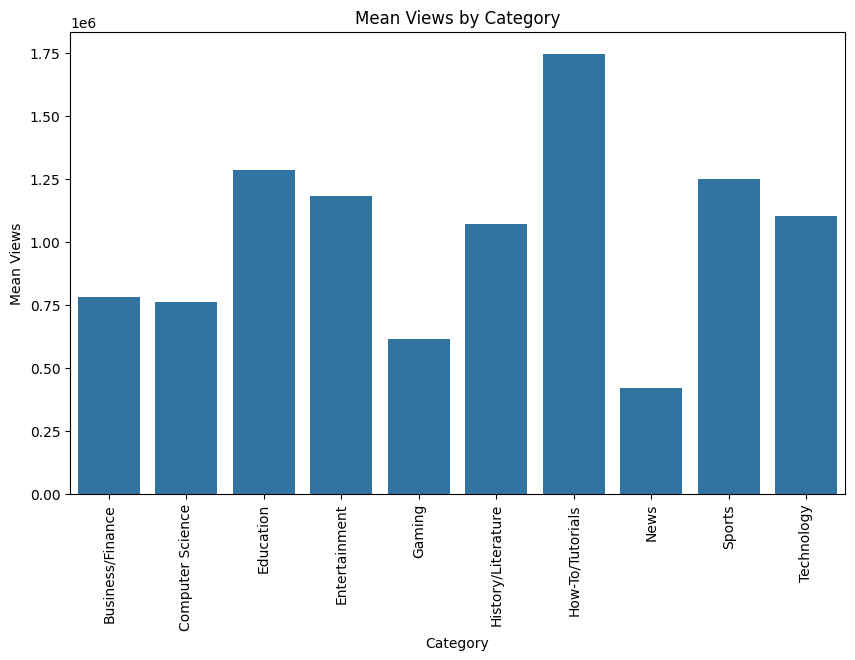

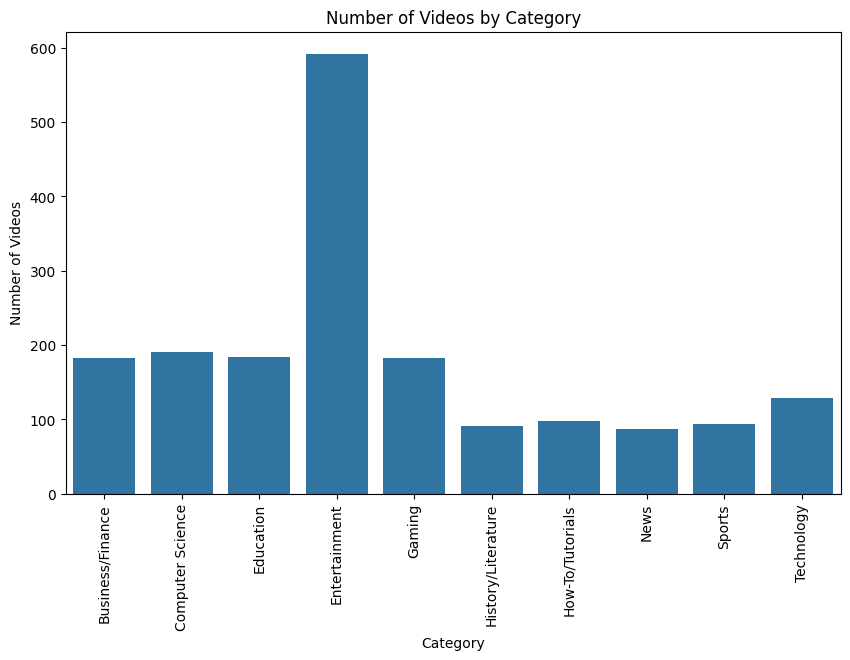

In [31]:
# bar graph for the mean views for each category and the number of videos in each category
# bar graph for the number of videos in each category
# show beside each other

plt.figure(figsize=(10, 6))
sns.barplot(x=category_stats.index, y=category_stats['Views_mean'])
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Mean Views')
plt.title('Mean Views by Category')


plt.figure(figsize=(10, 6))
sns.barplot(x=category_stats.index, y=category_stats['Number of Videos'])
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Videos')
plt.title('Number of Videos by Category')

# show both graphs beside each other
plt.show()

In [32]:
# bar graph for the mean views for each category and the number of videos in each categor

In [33]:
# show top 20 videos with the most views and likes sorted for entertainment category
entertainment = videos_stats[videos_stats['Category'] == 'Entertainment']
entertainment = entertainment.sort_values('Views', ascending=False)
entertainment[['Title', 'Views', 'Likes', 'Comments']].head(20)

,Title,Views,Likes,Comments
557,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,4034122271,16445558,732818
1121,Martin Garrix - Animals (Official Video),1582262997,11025176,335455
922,The Weeknd - Save Your Tears (Official Music V...,915457091,6823113,270948
1118,Maroon 5 - Animals (Official Music Video),826423766,5743875,178361
752,Powfu - death bed (coffee for your head) (Offi...,524709805,7786057,195769
652,One Direction - History (Official Video),434352213,5400589,434688
1145,Glass Animals - Heat Waves (Official Video),378164492,6177588,125791
757,Young Money - Bed Rock (Official Music Video),321977550,1430457,84188
775,Rihanna - California King Bed,308501014,1171433,61344
764,Bon Jovi - Bed Of Roses (Official Music Video),302125099,1072689,37571


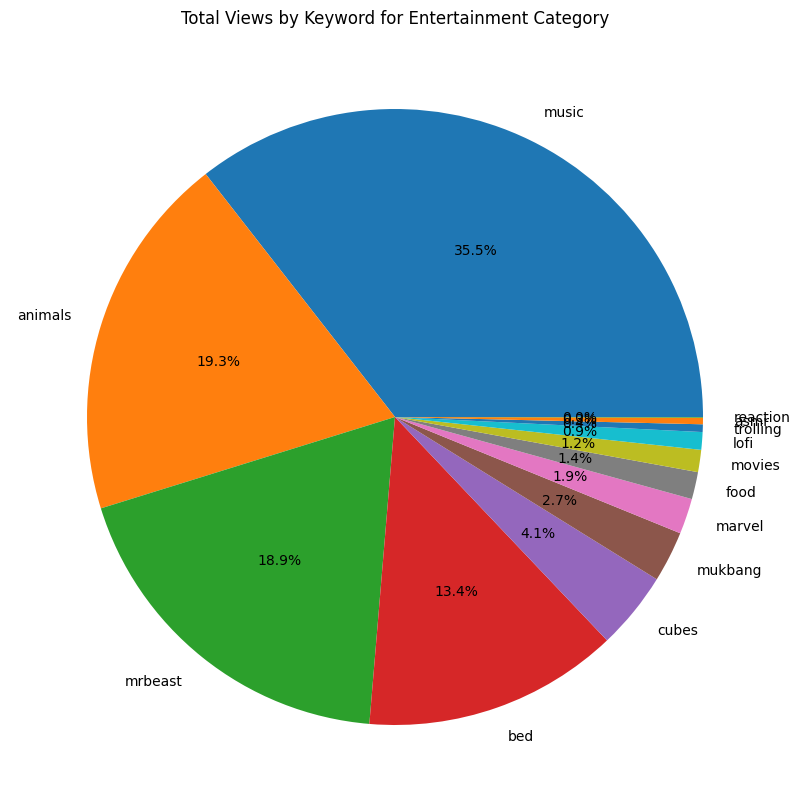

In [34]:
# plot a pie chart for the number of total views for each keyword for the entertainment category
entertainment_keyword_views = entertainment.groupby('Keyword')['Views'].sum()
entertainment_keyword_views = entertainment_keyword_views.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
plt.pie(entertainment_keyword_views, labels=entertainment_keyword_views.index, autopct='%1.1f%%')
plt.title('Total Views by Keyword for Entertainment Category')
plt.show()

In [35]:
# show the top 20 videos with the most views and likes sorted for the Technology category
technology = videos_stats[videos_stats['Category'] == 'Technology']
technology = technology.sort_values('Views', ascending=False)
technology[['Title', 'Views', 'Likes', 'Comments']].head(20)

,Title,Views,Likes,Comments
527,PIKOTARO - PPAP (Pen Pineapple Apple Pen) (Lon...,425478119,4144389,294428
591,Google — Year In Search 2021,239207161,169669,8630
555,If Google Was A Guy (Full Series),34484565,1046404,37539
590,Top New Comedy Video Amazing Funny Video 2021 ...,32300300,135952,2131
560,360° Google Dinosaur - T-REX in VR [4K] Video,26160434,193174,4232
594,How Google Search Works (in 5 minutes),20026987,124675,5828
577,LIFE-SAVING GADGETS and EMERGENCY HACKS YOU SH...,15836037,88325,1460
554,The Weirdest GOOGLE Searches,14296001,472660,37391
559,Fun Google Secrets,14269018,234520,9846
19,I bought the THINNEST Tech in the world.,11422924,363771,13609


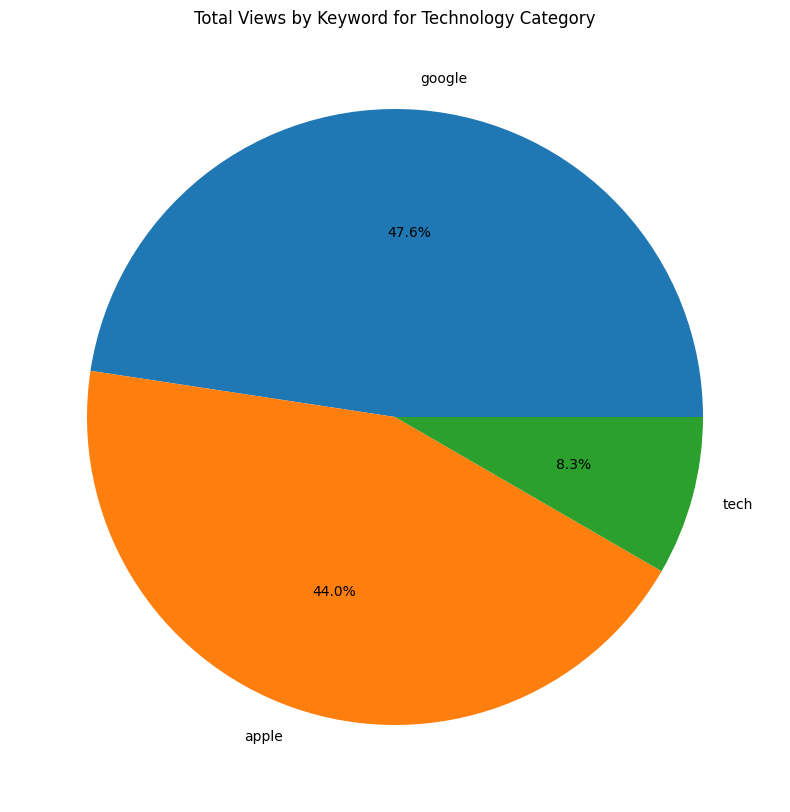

In [36]:
# plot a pie chart for the number of total views for each keyword for the technology category
technology_keyword_views = technology.groupby('Keyword')['Views'].sum()
technology_keyword_views = technology_keyword_views.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
plt.pie(technology_keyword_views, labels=technology_keyword_views.index, autopct='%1.1f%%')
plt.title('Total Views by Keyword for Technology Category')
plt.show()


In [37]:
# analyse videos with keyword 'data science' and 'machine learning'
data_science = videos_stats[(videos_stats['Keyword'] == 'data science' )|( videos_stats['Keyword'] == 'machine learning')]
data_science[['Title','Likes','Comments','Views']].sort_values('Views', ascending=False).head(20)

,Title,Likes,Comments,Views
1838,Machine Learning Course for Beginners,300789,6254,11814893
1851,2020 Machine Learning Roadmap (95% valid for 2...,176978,7152,10817160
1858,How I Learnt Machine Learning In 6 Steps (3 mo...,463331,21849,7497071
1863,Machine Learning Fundamentals: Bias and Variance,109335,2712,5028230
1731,Data Science In 5 Minutes | Data Science For B...,55282,576,2586478
1831,Machine Learning Basics | What Is Machine Lear...,43189,1155,2317183
1773,Work Week In My Life | Data Scientist at Spotify,55097,1543,2287752
1834,What is Machine Learning?,38776,566,2278698
1746,Is Data Science Dying in 2022?,56267,1146,2214491
1732,What is Data Science?,51915,876,2197690


Most preforming videos in the data science field are mostly about 

In [38]:
# Grouping data by industry (keyword) and calculating basic engagement metrics
industry_engagement_metrics_for_all_videos = videos_stats.groupby('Keyword').agg({
    'Views': [ 'median','min','max','sum','mean'],
    'Likes': ['median','min','max','sum','mean'],
    'Comments': ['median','min','max','sum','mean']
}).reset_index()

industry_engagement_metrics_for_all_videos .columns = ['_'.join(col).strip() for col in industry_engagement_metrics_for_all_videos .columns.values]
industry_engagement_metrics_for_all_videos .rename(columns={'Keyword_': 'Industry'}, inplace=True)

industry_engagement_metrics_without_trendy = videos_stats_no_trendy.groupby('Keyword').agg({
    'Views': [ 'mean'],
    'Likes': ['mean'],
    'Comments': ['mean']
}).reset_index()

industry_engagement_metrics_without_trendy.columns = ['_'.join(col).strip() for col in industry_engagement_metrics_without_trendy.columns.values]
industry_engagement_metrics_without_trendy.rename(columns={'Keyword_': 'Industry'}, inplace=True)

industry_engagement_metrics = pd.merge(industry_engagement_metrics_for_all_videos, industry_engagement_metrics_without_trendy, on='Industry', suffixes=('_all_videos', '_without_trendy'))

industry_engagement_metrics[['Industry','Views_median','Views_max','Views_mean_without_trendy']].sort_values('Views_mean_without_trendy', ascending=False)


,Industry,Views_median,Views_max,Views_mean_without_trendy
28,mrbeast,65074742.50,285526909,3282953.83
10,cubes,4795109.00,168546247,2570294.59
14,food,2456819.00,48018833,2150667.82
0,animals,4466776.00,1582262997,2052390.86
39,tutorial,2817913.50,68512549,1875008.41
3,bed,9359070.50,524709805,1856188.24
4,biology,1743151.00,23925458,1825077.97
17,google,2328295.00,239207161,1789878.80
25,mathchemistry,1806999.00,18496859,1757909.75
27,movies,1293718.00,65067408,1695848.97


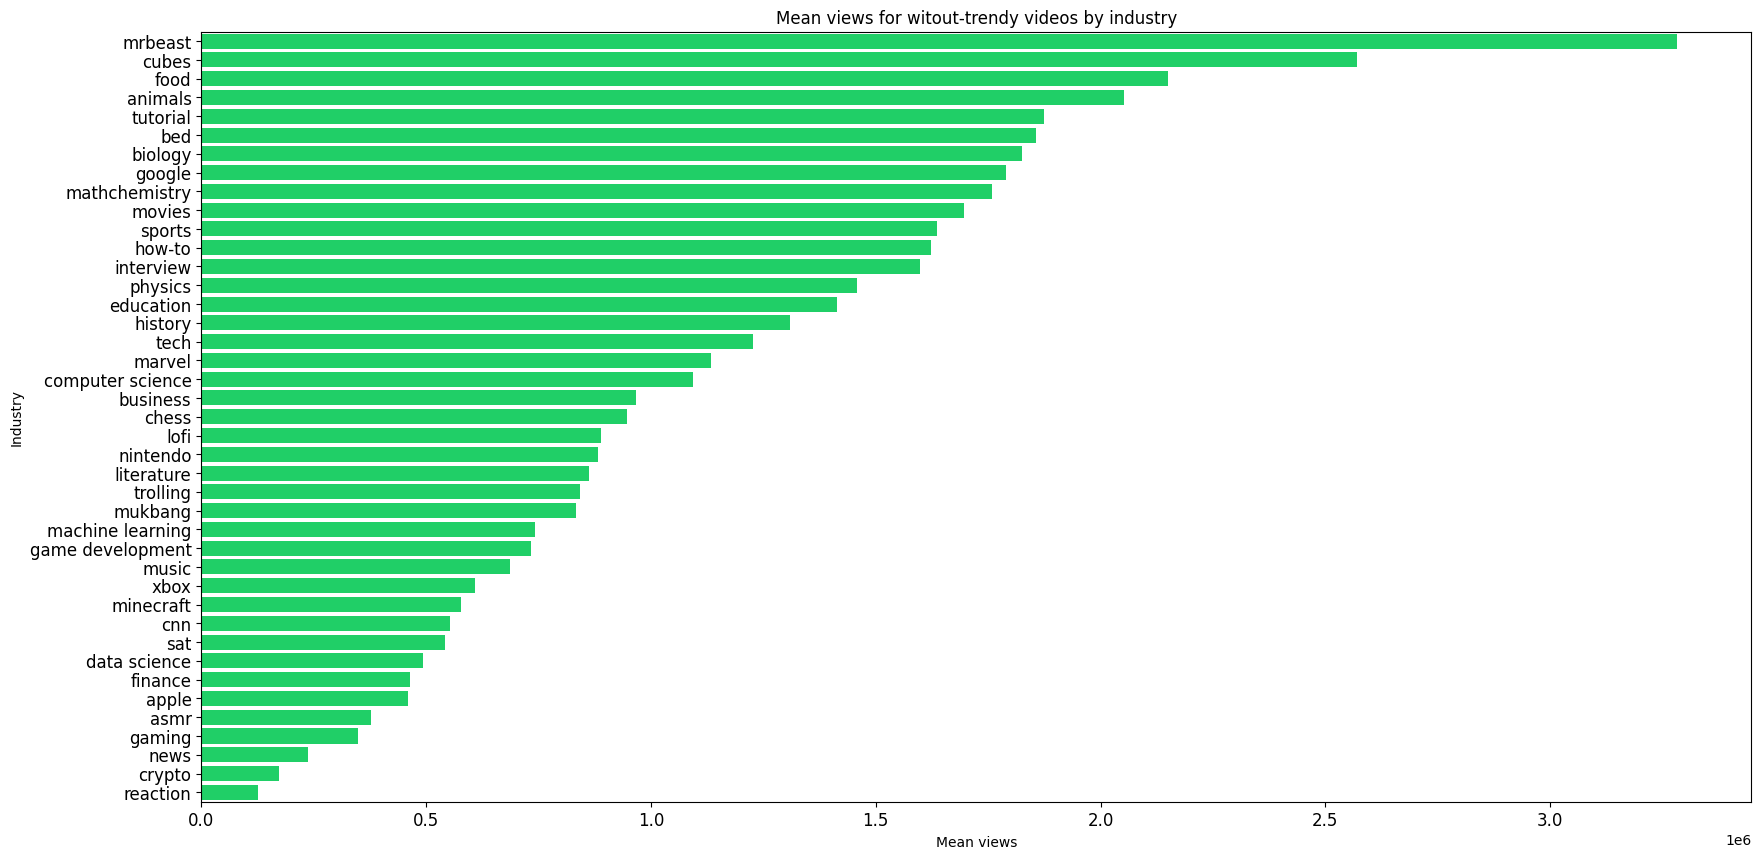

In [39]:
# bar chart for the mean views for non trendy videos  while sorting the industries by the mean views for non trendy videos
# color in #03EC61
plt.figure(figsize=(20, 10))
sns.barplot(data=industry_engagement_metrics.sort_values(by='Views_mean_without_trendy', ascending=False), x='Views_mean_without_trendy', y='Industry', color='#03EC61')
plt.xlabel('Mean views')
plt.ylabel('Industry')
# font of x and y labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mean views for witout-trendy videos by industry')
plt.show()

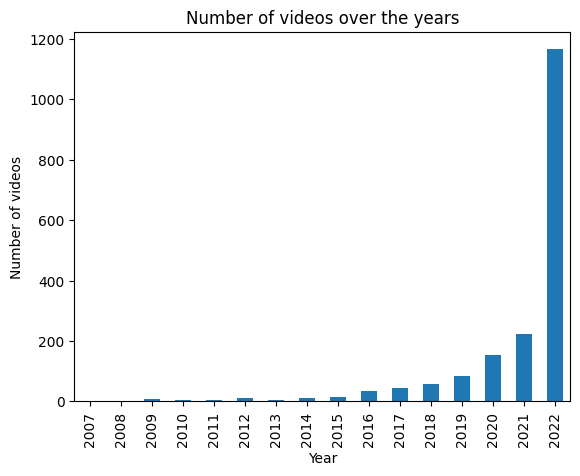

In [40]:
# number of videos over the time in years visualized in a bar chart
videos_stats['Published At'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of videos')
plt.title('Number of videos over the years')
plt.show()



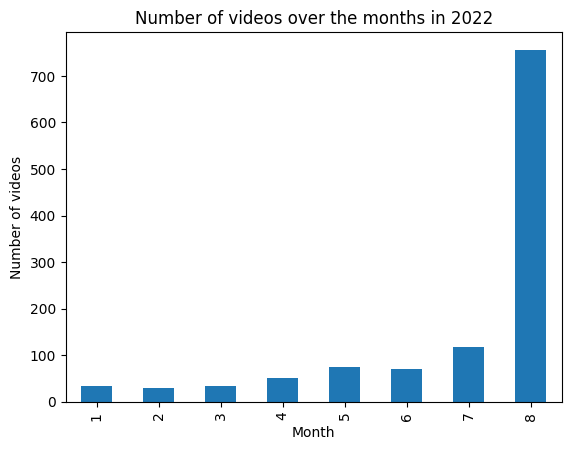

In [41]:
# number of videos over the time in months for 2022 visualized in a bar chart
videos_stats[videos_stats['Published At'].dt.year == 2022]['Published At'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of videos')
plt.title('Number of videos over the months in 2022')
plt.show()

Looks like 750 videos out of 1800 of the dataset came from augest 2022 which is the last month collected in the dataset

In [42]:
industry_engagement_metrics[['Industry','Views_mean_without_trendy','Views_mean_all_videos']].sort_values(by=['Views_mean_without_trendy','Views_mean_all_videos'],ascending=False)

,Industry,Views_mean_without_trendy,Views_mean_all_videos
28,mrbeast,3282953.83,66764003.98
10,cubes,2570294.59,14735344.12
14,food,2150667.82,5252406.25
0,animals,2052390.86,94598820.33
39,tutorial,1875008.41,6761032.02
3,bed,1856188.24,53893228.61
4,biology,1825077.97,4121605.83
17,google,1789878.80,11614081.05
25,mathchemistry,1757909.75,3565846.71
27,movies,1695848.97,5278660.05


Let's look at the very popular videos
Since outliers are actual trendy videos, removing them is not an option because they drive important insights

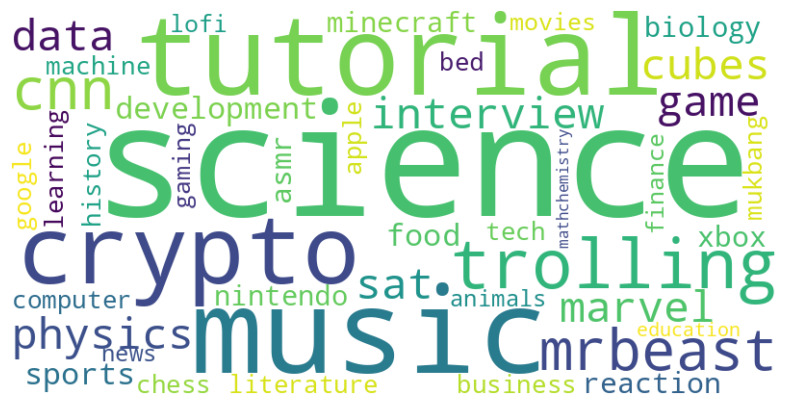

In [43]:
# Generate a word cloud for the 'Keyword' column
keyword_counts = " ".join(keyword for keyword in videos_stats['Keyword'])
wordcloud = WordCloud(width = 800, height = 400, background_color ='white',collocations=False).generate(keyword_counts)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
# show top 100 most viewed videos
top_100_videos = videos_stats.sort_values(by='Views', ascending=False).head(10)
top_100_videos

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,Category
557,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,FzG4uDgje3M,2018-04-05,music,16445558,732818,4034122271,Entertainment
1121,Martin Garrix - Animals (Official Video),gCYcHz2k5x0,2013-06-17,animals,11025176,335455,1582262997,Entertainment
922,The Weeknd - Save Your Tears (Official Music V...,XXYlFuWEuKI,2021-01-05,music,6823113,270948,915457091,Entertainment
1118,Maroon 5 - Animals (Official Music Video),qpgTC9MDx1o,2014-09-29,animals,5743875,178361,826423766,Entertainment
752,Powfu - death bed (coffee for your head) (Offi...,jJPMnTXl63E,2020-04-01,bed,7786057,195769,524709805,Entertainment
652,One Direction - History (Official Video),yjmp8CoZBIo,2016-01-26,music,5400589,434688,434352213,Entertainment
527,PIKOTARO - PPAP (Pen Pineapple Apple Pen) (Lon...,Ct6BUPvE2sM,2016-11-02,apple,4144389,294428,425478119,Technology
1145,Glass Animals - Heat Waves (Official Video),mRD0-GxqHVo,2020-06-29,animals,6177588,125791,378164492,Entertainment
757,Young Money - Bed Rock (Official Music Video),Ha80ZaecGkQ,2009-12-16,bed,1430457,84188,321977550,Entertainment
775,Rihanna - California King Bed,nhBorPm6JjQ,2011-05-07,bed,1171433,61344,308501014,Entertainment


In [45]:
videos_to_change_indexs = [557,652,227,1129,653]
videos_stats.loc[videos_to_change_indexs, 'Keyword'] = 'music'
# print a list of all keywords
videos_stats['Keyword'].unique()
#creating categories for the keywords
categories = {
    "Technology": ['tech', 'apple', 'google'],
    "News": ['news', 'cnn'],
    "Gaming": ['gaming', 'minecraft', 'nintendo', 'xbox'],
    "Sports": ['sports', 'chess'],
    "How-To/Tutorials": ['how-to', 'tutorial'],
    "Business/Finance": ['business', 'finance', 'crypto','interview'],
    "History/Literature": ['history', 'literature'],
    "Entertainment": ['bed', 'trolling', 'asmr', 'music', 'food', 'mukbang', 'reaction', 'lofi', 'animals', 'mrbeast','marvel' ,'movies','cubes'],
    "Education": ['education', 'sat', 'mathchemistry', 'biology', 'physics'],
    "Computer Science": ['computer science','game development','data science','machine learning']
}

# Function to map keywords to categories
def map_keyword_to_category(keyword):
    for category, keywords in categories.items():
        if keyword in keywords:
            return category
    return 'Uncategorized'

# Create the new 'category' column
videos_stats['Category'] = videos_stats['Keyword'].apply(map_keyword_to_category)


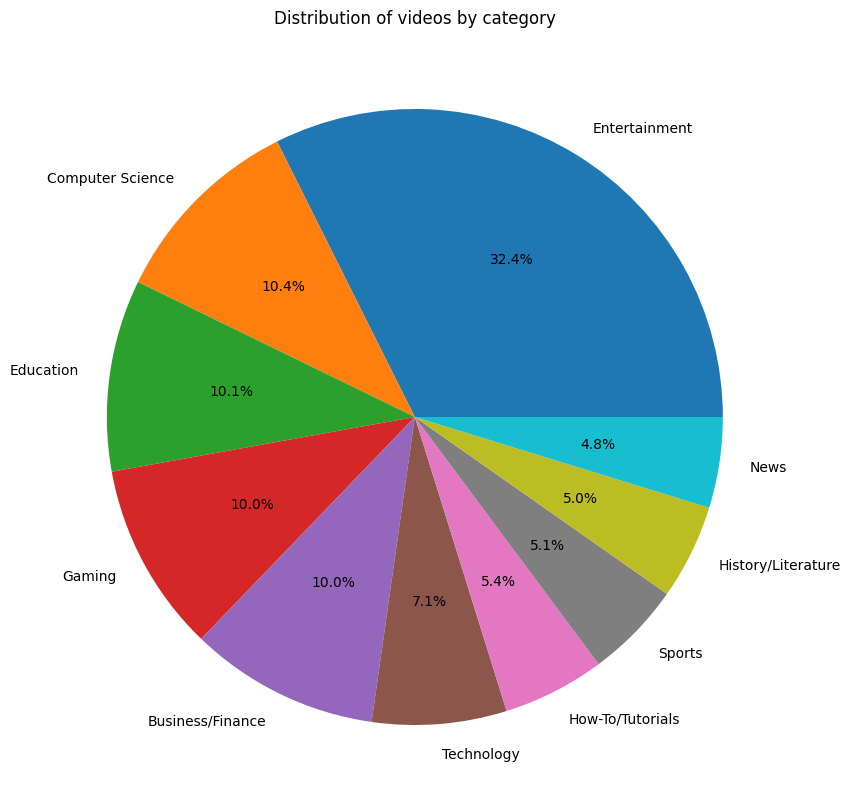

In [46]:
# Create a pie chart showing the the views for each category
plt.figure(figsize=(10, 10))
videos_stats['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution of videos by category')
plt.show()


In [47]:
# show the top 10 vieos in education category
top_10_education_videos = videos_stats[videos_stats['Category'] == 'Education'].sort_values(by='Views', ascending=False).head(10)
top_10_education_videos

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,Category
1475,When a physics teacher knows his stuff !!,77ZF50ve6rs,2016-03-04,physics,1194852,16417,42252029,Education
1396,Biology: Cell Structure I Nucleus Medical Media,URUJD5NEXC8,2015-03-18,biology,396477,10721,23925458,Education
1461,Michio Kaku: The Universe in a Nutshell (Full ...,0NbBjNiw4tk,2012-08-15,physics,296448,29736,19097087,Education
1386,SCIENCE WARS - Acapella Parody | SCIENCE SONGS,LTXTeAt2mpg,2015-12-04,mathchemistry,542855,43802,18496859,Education
1278,SAT Math: The Ultimate Guessing Trick,Z1-8o3bH674,2011-10-07,sat,712273,32736,18116954,Education
1433,Biology: Digestive System Video,bo2Ape8JHqA,2009-02-16,biology,132214,5981,17716356,Education
1169,RSA ANIMATE: Changing Education Paradigms,zDZFcDGpL4U,2010-10-14,education,130817,6868,17103736,Education
1464,"8 Year Old LOST His GIRLFRIEND To A Rich Kid, ...",c0Ir6O1JB-I,2019-11-19,physics,673896,41869,14835017,Education
1410,1. Introduction to Human Behavioral Biology,NNnIGh9g6fA,2011-02-01,biology,310947,15981,14800155,Education
1476,Amazing Physics Toys/Gadgets 1,Y5dylh2aOiw,2022-02-26,physics,188472,5901,13829574,Education


In [48]:
# show the order of the most popular keywords within the education category based on views
education_keywords_by_views = videos_stats[videos_stats['Category'] == 'Education'].groupby('Keyword').agg({'Views': 'sum'}).sort_values(by='Views', ascending=False)
education_keywords_by_views

,Views
Keyword,
biology,193715474
physics,184619364
education,64426388
sat,52227567
mathchemistry,49921854


# Sentiment analysis 

In [49]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [50]:
# # Ensure consistent results from langdetect
# DetectorFactory.seed = 0

# # apply lang detect to the comments
# def detect_language(comment):
#     try:
#         return detect(comment)
#     except LangDetectException:
#         return 'unknown'

# comments['Language'] = comments['Comment'].apply(detect_language)

In [51]:
# # show the number of comments in each language
# comments['Language'].value_counts()

In [52]:
# # Languages supported for pysentimiento: 
# supported_languages = ['es', 'en', 'pt']
# comments[comments['Language'].isin(supported_languages)]

In [53]:
import torch
import pysentimiento
from pysentimiento import create_analyzer
from pysentimiento.preprocessing import preprocess_tweet

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [54]:
# comments = comments[comments['Language'].isin(supported_languages)]

In [55]:
# change sentiment column to existing sentiment score column name
comments = comments.rename(columns={'Sentiment':'Existing_sentiment'})
# change Sentiment labels from 0,1,2 to POS,NEG,NEU
comments['Existing_sentiment'] = comments['Existing_sentiment'].replace({0: 'NEG', 1: 'NEU', 2: 'POS'})

In [56]:
# # Initialize the sentiment analyzers for each supported language
# # I am not including it because I didn't find that the model return good results and they are just 44 comments
# analyzers = {
#     'es': create_analyzer(task="sentiment", lang="es"),
#     'en': create_analyzer(task="sentiment", lang="en"),
#     'pt': create_analyzer(task="sentiment", lang="pt")
# }

# # Function to get sentiment
# def get_sentiment(text, lang):
#     analyzer = analyzers[lang]
#     result = analyzer.predict(text)
#     return result.output

# # Apply sentiment analysis for each comment
# comments['Sentiment'] = comments.apply(lambda row: get_sentiment(row['Comment'], row['Language']), axis=1)


In [57]:
comments 

,Video ID,Comment,Likes,Existing_sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,NEU
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,NEG
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,POS
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,NEG
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,POS
...,...,...,...,...
18404,cyLWtMSry58,I really like the point about engineering tool...,0,POS
18405,cyLWtMSry58,I’ve just started exploring this field. And th...,20,POS
18406,cyLWtMSry58,Excelente video con una pregunta filosófica pr...,1,NEU
18407,cyLWtMSry58,"Hey Daniel, just discovered your channel a cou...",35,POS


In [58]:
# # save the dataset  to a new csv file called comments_with_sentiment.csv
# comments.to_pickle('comments_with_sentiment.pkl', index=False)


In [59]:
# copy
#comments_back_up=comments.copy()

In [60]:
comments = pd.read_pickle('comments_with_sentiment.pkl')

In [61]:
comments

,Video ID,Comment,Likes,Existing_sentiment,Language,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,NEU,en,NEU
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,NEG,en,NEG
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,POS,en,POS
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,NEG,en,NEG
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,POS,en,POS
...,...,...,...,...,...,...
18404,cyLWtMSry58,I really like the point about engineering tool...,0,POS,en,POS
18405,cyLWtMSry58,I’ve just started exploring this field. And th...,20,POS,en,POS
18406,cyLWtMSry58,Excelente video con una pregunta filosófica pr...,1,NEU,es,POS
18407,cyLWtMSry58,"Hey Daniel, just discovered your channel a cou...",35,POS,en,POS


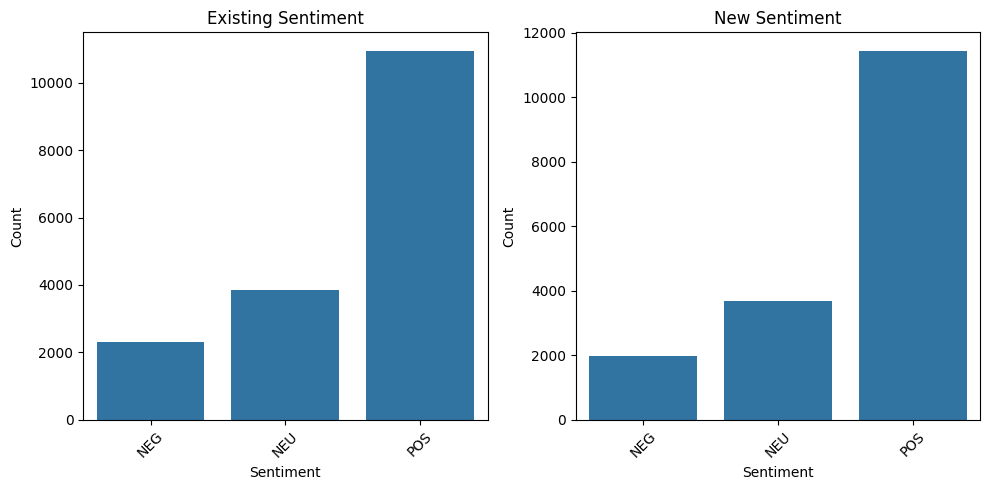

In [62]:
# ITS BETTER TO CREATE PERCENTAGES  

# create two count plots beside each other for the existing sentiment and the new sentiment columns and show they count numbers on top of the bars
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=comments, x='Existing_sentiment', order=['NEG', 'NEU', 'POS'])
plt.title('Existing Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.countplot(data=comments, x='Sentiment', order=['NEG', 'NEU', 'POS'])
plt.title('New Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
comments['Sentiment'].value_counts()

Sentiment
POS    11446
NEU     3671
NEG     1977
Name: count, dtype: int64

In [64]:
# value counts for the existing sentiment
comments['Existing_sentiment'].value_counts()

Existing_sentiment
POS    10951
NEU     3841
NEG     2302
Name: count, dtype: int64

In [65]:
# check the dataframe where the sentiment is different
different_sentiment = comments[comments['Existing_sentiment'] != comments['Sentiment']]
different_sentiment[different_sentiment['Existing_sentiment'] == 'NEU']

,Video ID,Comment,Likes,Existing_sentiment,Language,Sentiment
44,ErMwWXQxHp0,BEST BUY: We want to sponsor a back to school ...,104,NEU,en,POS
45,ErMwWXQxHp0,Most of the items you recommend are pretty pri...,2106,NEU,en,POS
50,18fwz9Itbvo,"When he says he's a 400 year old beer wizard, ...",5092,NEU,en,POS
54,18fwz9Itbvo,"idk who’s picking these people, but give them ...",8073,NEU,en,NEG
64,jXf04bhcjbg,Shout to you John Oliver for giving me a brief...,196,NEU,en,POS
...,...,...,...,...,...,...
18372,7ClLKBUvmRk,Muchas felicidades por los logros y excelente ...,1,NEU,es,POS
18374,7ClLKBUvmRk,"Gran explicación, he pasado horas intentando e...",3,NEU,es,POS
18375,7ClLKBUvmRk,Pocas veces te encuentras personas que realmen...,2,NEU,es,POS
18378,7ClLKBUvmRk,Haydé: Como colega en IT y persona te mereces ...,1,NEU,es,POS


In [66]:
accuracy = accuracy_score(comments['Existing_sentiment'], comments['Sentiment'])
print(f'Similarity to the existing sentiment: {accuracy}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(comments['Existing_sentiment'], comments['Sentiment'], labels=['POS', 'NEG', 'NEU'])
print('Confusion Matrix:')
print(conf_matrix)

# Calculate classification report
class_report = classification_report(comments['Existing_sentiment'], comments['Sentiment'], labels=['POS', 'NEG', 'NEU'])
print('Classification Report:')
print(class_report)


Similarity to the existing sentiment: 0.8557973557973558
Confusion Matrix:
[[10374    60   517]
 [  125  1639   538]
 [  947   278  2616]]


Classification Report:
              precision    recall  f1-score   support

         POS       0.91      0.95      0.93     10951
         NEG       0.83      0.71      0.77      2302
         NEU       0.71      0.68      0.70      3841

    accuracy                           0.86     17094
   macro avg       0.82      0.78      0.80     17094
weighted avg       0.85      0.86      0.85     17094



In [67]:
# merge the comments with the videos_stats while changing the left Likes to Comment_likes and the right likes to Video_likes
comments_with_video_stats = pd.merge(comments, videos_stats, on='Video ID', how='inner')
comments_with_video_stats = comments_with_video_stats.rename(columns={'Likes_x': 'Comment_likes', 'Likes_y': 'Video_likes'})

In [68]:
comments_with_video_stats.sort_values(ascending=False, by='Views').head(10)

,Video ID,Comment,Comment_likes,Existing_sentiment,Language,Sentiment,Title,Published At,Keyword,Video_likes,Comments,Views,Category
4815,FzG4uDgje3M,He's a good dancer,3,POS,en,POS,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4820,FzG4uDgje3M,I listened to this before and now I’m listenin...,9,NEU,en,NEU,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4814,FzG4uDgje3M,imagínate ser una generación tan de cristal qu...,7972,NEU,es,NEG,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4822,FzG4uDgje3M,Young people at 2022:Again this song!\nPeople ...,17,POS,en,NEU,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4821,FzG4uDgje3M,Really Enjoyed it!,14,POS,en,POS,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4823,FzG4uDgje3M,i remember when this first came out and i kept...,7,POS,en,POS,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4819,FzG4uDgje3M,0:01 melhor parte kk,18,NEU,pt,POS,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4818,FzG4uDgje3M,22/08/2022. Nostalgia de Respeito e Maravilhos...,8,POS,pt,POS,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4817,FzG4uDgje3M,J’adore 🥰 🥰🥰🥰🥰,0,POS,pt,POS,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4816,FzG4uDgje3M,Whoever made this masterpiece really knows wha...,29,NEU,en,POS,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment


In [69]:
# Assigning the title of the most viewed vide 
most_viewed_video_title = videos_stats[videos_stats['Views'] == videos_stats['Views'].max()]['Title'].values[0]
most_viewed_video_title
# select the most_viewed_video_title from the comments_with_video_stats
comments_with_video_stats[comments_with_video_stats['Title'] == most_viewed_video_title]

,Video ID,Comment,Comment_likes,Existing_sentiment,Language,Sentiment,Title,Published At,Keyword,Video_likes,Comments,Views,Category
4814,FzG4uDgje3M,imagínate ser una generación tan de cristal qu...,7972,NEU,es,NEG,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4815,FzG4uDgje3M,He's a good dancer,3,POS,en,POS,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4816,FzG4uDgje3M,Whoever made this masterpiece really knows wha...,29,NEU,en,POS,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4817,FzG4uDgje3M,J’adore 🥰 🥰🥰🥰🥰,0,POS,pt,POS,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4818,FzG4uDgje3M,22/08/2022. Nostalgia de Respeito e Maravilhos...,8,POS,pt,POS,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4819,FzG4uDgje3M,0:01 melhor parte kk,18,NEU,pt,POS,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4820,FzG4uDgje3M,I listened to this before and now I’m listenin...,9,NEU,en,NEU,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4821,FzG4uDgje3M,Really Enjoyed it!,14,POS,en,POS,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4822,FzG4uDgje3M,Young people at 2022:Again this song!\nPeople ...,17,POS,en,NEU,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment
4823,FzG4uDgje3M,i remember when this first came out and i kept...,7,POS,en,POS,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,music,16445558,732818,4034122271,Entertainment


In [70]:
#sum of rows count grouped by video Title

videos_selected=comments_with_video_stats.groupby('Title').count().sort_values('Comment', ascending=False)
videos_selected.describe()

,Video ID,Comment,Comment_likes,Existing_sentiment,Language,Sentiment,Published At,Keyword,Video_likes,Comments,Views,Category
count,1765.00,1765.00,1765.00,1765.00,1765.00,1765.00,1765.00,1765.00,1765.00,1765.00,1765.00,1765.00
mean,9.49,9.49,9.49,9.49,9.49,9.49,9.49,9.49,9.49,9.49,9.49,9.49
std,2.03,2.03,2.03,2.03,2.03,2.03,2.03,2.03,2.03,2.03,2.03,2.03
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
50%,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
75%,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
max,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00


In [71]:
# Count the number of each sentiment type per video
sentiment_counts = comments_with_video_stats.groupby('Video ID')['Sentiment'].value_counts().unstack().fillna(0)
sentiment_counts = sentiment_counts[['POS', 'NEU', 'NEG']]
sentiment_counts['Total'] = sentiment_counts['POS'] + sentiment_counts['NEU'] + sentiment_counts['NEG']
sentiment_counts['Video_sentiment'] = (sentiment_counts['POS'] - sentiment_counts['NEG']) / sentiment_counts['Total']


In [72]:
sentiment_counts.sort_values('Video_sentiment', ascending=True)

Sentiment,POS,NEU,NEG,Total,Video_sentiment
Video ID,,,,,
XHKojSQxTs0,0.00,0.00,1.00,1.00,-1.00
wjhbTqGt5tc,0.00,0.00,1.00,1.00,-1.00
beKk6mEWSuA,0.00,0.00,3.00,3.00,-1.00
9QW7CORIoFw,0.00,0.00,1.00,1.00,-1.00
w3Ma0Z08IFU,0.00,0.00,1.00,1.00,-1.00
...,...,...,...,...,...
B2EnaKgF08M,10.00,0.00,0.00,10.00,1.00
Q-mAWItV2q0,10.00,0.00,0.00,10.00,1.00
1H2l7dHq1fs,10.00,0.00,0.00,10.00,1.00


In [73]:
sentiment_counts[sentiment_counts['Total'] < 3]

Sentiment,POS,NEU,NEG,Total,Video_sentiment
Video ID,,,,,
0vEdNPoeemQ,1.00,0.00,0.00,1.00,1.00
3qu5y7J2JcY,1.00,0.00,0.00,1.00,1.00
4Co4mDeCIJ4,1.00,0.00,0.00,1.00,1.00
514QAJMYHus,0.00,1.00,0.00,1.00,0.00
7RvBj9r5Dhg,0.00,1.00,0.00,1.00,0.00
88w5Q03Lcro,1.00,0.00,0.00,1.00,1.00
8Vqj8Ls29HI,1.00,0.00,0.00,1.00,1.00
9QW7CORIoFw,0.00,0.00,1.00,1.00,-1.00
ARnERQncs0I,1.00,0.00,0.00,1.00,1.00


In [74]:
videos_stats_with_sentiment = videos_stats.merge(sentiment_counts[['Video_sentiment']], on='Video ID', how='inner')

In [75]:
# drop column 
videos_stats_with_sentiment=videos_stats_with_sentiment.drop(columns=['Published At','Video ID'])


In [76]:
videos_stats_with_sentiment.sort_values('Video_sentiment', ascending=False)

,Title,Keyword,Likes,Comments,Views,Category,Video_sentiment
1777,"Andrew Ng: Deep Learning, Education, and Real-...",machine learning,5198,443,226152,Computer Science,1.00
532,A Day In The Life Of Sundar Pichai (Google&#39...,google,107571,3380,6123730,Technology,1.00
627,The Entire History of Viking Britain // Mediev...,history,16874,1248,1687706,History/Literature,1.00
622,The Entire History of the Akkadians // Ancient...,history,47683,2407,5399988,History/Literature,1.00
605,50 Cent Talks &quot;Tycoon Houston Comedy Fest...,interview,52335,5602,2399810,Business/Finance,1.00
...,...,...,...,...,...,...,...
1087,SAY HALO To Animals!!!|Doodle with me (Part 4),animals,37,1,31343,Entertainment,-1.00
1188,中国人挑战美国SAT数学…考完一半就弃考了！？！,sat,4144,895,419705,Education,-1.00
551,Top New Comedy Video Amazing Funny Video 2021 ...,google,135952,2131,32300300,Technology,-1.00
62,Zee Hindustan Live News: Attack On Nitish Kuma...,news,1288,3,172513,News,-1.00


In [77]:
# save 
videos_stats_with_sentiment.to_csv('videos_stats_with_sentiment.csv', index=False)

In [78]:
# AVerage sentiment across categories
category_sentiment = videos_stats_with_sentiment.groupby('Category').agg({'Video_sentiment': 'mean'})
category_sentiment.sort_values('Video_sentiment', ascending=False)

,Video_sentiment
Category,
Computer Science,0.68
How-To/Tutorials,0.67
Entertainment,0.66
Gaming,0.57
Sports,0.53
Education,0.52
Business/Finance,0.50
Technology,0.44
History/Literature,0.43


In [79]:
keywords_sentiment = videos_stats_with_sentiment.groupby('Keyword').agg({'Video_sentiment': 'mean'})
keywords_sentiment.sort_values('Video_sentiment', ascending=False)

,Video_sentiment
Keyword,
lofi,0.85
asmr,0.84
music,0.81
mukbang,0.76
mathchemistry,0.76
machine learning,0.75
mrbeast,0.74
tutorial,0.74
bed,0.72


In [101]:
def get_top_videos(keyword, n=10):
    return videos_stats_with_sentiment[videos_stats_with_sentiment['Keyword'] == keyword].sort_values(by=['Video_sentiment','Likes'], ascending=[False,False]).head(n)
get_top_videos('machine learning')

,Title,Keyword,Likes,Comments,Views,Category,Video_sentiment
1750,2020 Machine Learning Roadmap (95% valid for 2...,machine learning,176978,7152,10817160,Computer Science,1.00
1746,Intro to Machine Learning (ML Zero to Hero - P...,machine learning,34464,822,1651599,Computer Science,1.00
1748,Machine Learning Zero to Hero (Google I/O&#39;19),machine learning,29818,1028,854273,Computer Science,1.00
1758,Deep Learning Crash Course for Beginners,machine learning,18847,76,1414209,Computer Science,1.00
1738,11. Introduction to Machine Learning,machine learning,13141,382,181827,Computer Science,1.00
1777,"Andrew Ng: Deep Learning, Education, and Real-...",machine learning,5198,443,226152,Computer Science,1.00
1772,Machine Learning Tutorial | Machine Learning B...,machine learning,4759,232,130286,Computer Science,1.00
1768,Reinforcement Learning: Machine Learning Meets...,machine learning,3505,408,257103,Computer Science,1.00
1776,Todos podemos aprender Machine learning,machine learning,2981,72,431421,Computer Science,1.00
1734,What is Machine Learning?,machine learning,38776,566,2278698,Computer Science,0.90
